Dataset Source https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/

In [125]:
#Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
#Read the dataset
df = pd.read_csv('cardio_train.csv', sep=';')

In [127]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [128]:
df = df.set_index('id')

In [129]:
#getting the list of columns
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [130]:
df.shape

(70000, 12)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [132]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
#converting age from days to years
df["age"] = (df.age/365)
df.age = df.age.astype(int)

In [134]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [135]:
print("Seems like Blood Pressures have outliers as both max and min values are skewed ")

Seems like Blood Pressures have outliers as both max and min values are skewed 


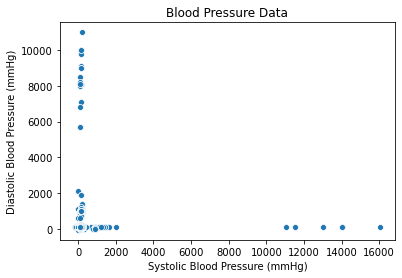

<Figure size 720x360 with 0 Axes>

In [136]:
sns.scatterplot(data = df, x = "ap_hi", y = "ap_lo")
plt.title("Blood Pressure Data")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Diastolic Blood Pressure (mmHg)")
plt.figure(figsize = (10,5))
plt.show()

In [137]:
print(" Accordin to this google link https://www.google.com/search?q=maximum+possible+blood+pressure&sca_esv=588006686&sxsrf=AM9HkKmHJ_iADfczjA1nT6-saIezmhmyrw%3A1701782978205&ei=wiVvZYqJDJawi-gPptyi0Ak&ved=0ahUKEwiK8pnPs_iCAxUW2AIHHSauCJoQ4dUDCBA&uact=5&oq=maximum+possible+blood+pressure&gs_lp=Egxnd3Mtd2l6LXNlcnAiH21heGltdW0gcG9zc2libGUgYmxvb2QgcHJlc3N1cmUyBRAAGIAEMgYQABgWGB4yBhAAGBYYHjILEAAYgAQYigUYhgMyCxAAGIAEGIoFGIYDMgsQABiABBiKBRiGA0i-PlAAWPk8cAB4AZABAJgBkAGgAfEVqgEFMjAuMTG4AQPIAQD4AQHCAgQQIxgnwgIKECMYgAQYigUYJ8ICCxAAGIAEGIoFGJECwgILEAAYgAQYsQMYgwHCAg4QABiABBiKBRixAxiDAcICCxAAGIAEGIoFGLEDwgIIEAAYgAQYsQPCAgoQABiABBiKBRhDwgIREC4YgAQYsQMYgwEYxwEY0QPCAgUQLhiABMICDhAuGIAEGIoFGJECGLEDwgIOEC4YgAQYsQMYxwEY0QPCAhEQLhiABBiKBRixAxjHARjRA8ICChAuGIAEGIoFGEPCAgsQLhiABBjHARivAcICBBAuGAPCAgoQABiABBgUGIcCwgILEC4YgAQYxwEY0QPCAgcQABiABBgKwgIIEAAYFhgeGA_iAwQYACBBiAYB&sclient=gws-wiz-serp, highest blood pressure ever recorded in 370")

 Accordin to this google link https://www.google.com/search?q=maximum+possible+blood+pressure&sca_esv=588006686&sxsrf=AM9HkKmHJ_iADfczjA1nT6-saIezmhmyrw%3A1701782978205&ei=wiVvZYqJDJawi-gPptyi0Ak&ved=0ahUKEwiK8pnPs_iCAxUW2AIHHSauCJoQ4dUDCBA&uact=5&oq=maximum+possible+blood+pressure&gs_lp=Egxnd3Mtd2l6LXNlcnAiH21heGltdW0gcG9zc2libGUgYmxvb2QgcHJlc3N1cmUyBRAAGIAEMgYQABgWGB4yBhAAGBYYHjILEAAYgAQYigUYhgMyCxAAGIAEGIoFGIYDMgsQABiABBiKBRiGA0i-PlAAWPk8cAB4AZABAJgBkAGgAfEVqgEFMjAuMTG4AQPIAQD4AQHCAgQQIxgnwgIKECMYgAQYigUYJ8ICCxAAGIAEGIoFGJECwgILEAAYgAQYsQMYgwHCAg4QABiABBiKBRixAxiDAcICCxAAGIAEGIoFGLEDwgIIEAAYgAQYsQPCAgoQABiABBiKBRhDwgIREC4YgAQYsQMYgwEYxwEY0QPCAgUQLhiABMICDhAuGIAEGIoFGJECGLEDwgIOEC4YgAQYsQMYxwEY0QPCAhEQLhiABBiKBRixAxjHARjRA8ICChAuGIAEGIoFGEPCAgsQLhiABBjHARivAcICBBAuGAPCAgoQABiABBgUGIcCwgILEC4YgAQYxwEY0QPCAgcQABiABBgKwgIIEAAYFhgeGA_iAwQYACBBiAYB&sclient=gws-wiz-serp, highest blood pressure ever recorded in 370


In [138]:
print(" Lowest possible blood pressure is around 40")

 Lowest possible blood pressure is around 40


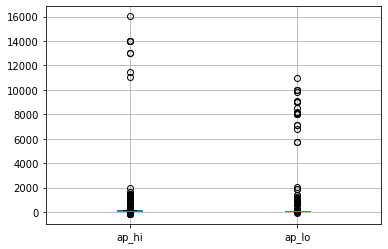

In [139]:
boxplot = df.boxplot(column=['ap_hi', 'ap_lo'])  

In [140]:
#dropping anything less than 0
negatives = df[(df['ap_hi'] < 0)]

In [141]:
negatives = df[(df['ap_hi'] < 0)]

In [142]:
df = df.drop(negatives.index)

In [143]:
#dropping the outliers using 1.5 interquantile range for ap_hi
# calculate IQR for column ap_hi
Q1 = df['ap_hi'].quantile(0.25)
Q3 = df['ap_hi'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['ap_hi'] < Q1 - threshold * IQR) | (df['ap_hi'] > Q3 + threshold * IQR)]

In [144]:
outliers.shape

(1428, 12)

In [145]:
#calculate outliers using standard deviations
upper_boundary = df["ap_hi"].median() + 3 * df["ap_hi"].std()
lower_boundary = df["ap_hi"].median() - 3 * df["ap_hi"].std()
outliers_std = df[(df['ap_hi'] < lower_boundary) | (df['ap_hi'] > upper_boundary)]

In [146]:
outliers_std.shape

(38, 12)

In [147]:
df = df.drop(outliers_std.index)

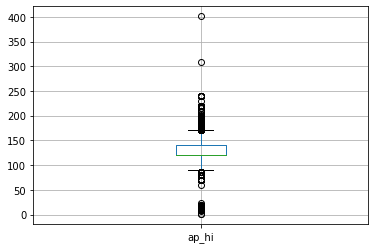

In [148]:
boxplot = df.boxplot(column=['ap_hi'])  

In [149]:
(df['ap_hi'] < 50).sum()

181

In [150]:
#drop everything below 50
less = df[(df['ap_hi'] < 50)]
df = df.drop(less.index)

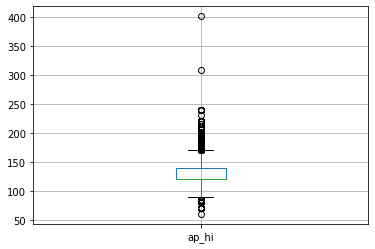

In [151]:
boxplot = df.boxplot(column=['ap_hi'])  

In [152]:
#lets drop that 2 outlier as well!
more = df[(df['ap_hi'] >250 )]
df = df.drop(more.index)

In [153]:
#doing the same procedure with ap_lo
negatives = df[(df['ap_lo'] < 0)]
df = df.drop(negatives.index)
upper_boundary = df["ap_lo"].median() + 3 * df["ap_lo"].std()
lower_boundary = df["ap_lo"].median() - 3 * df["ap_lo"].std()
outliers_std = df[(df['ap_lo'] < lower_boundary) | (df['ap_lo'] > upper_boundary)]
df = df.drop(outliers_std.index)

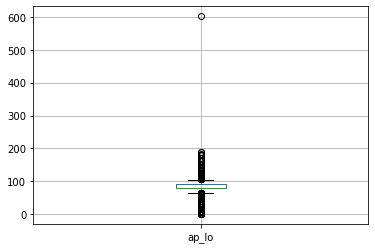

In [154]:
boxplot = df.boxplot(column=['ap_lo'])  

In [155]:
#drop everything above 250
more = df[(df['ap_lo'] > 250)]
df = df.drop(more.index)

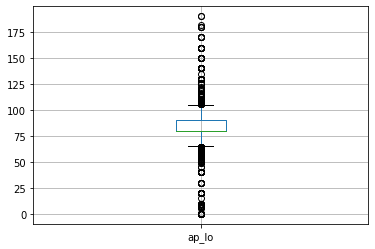

In [156]:
boxplot = df.boxplot(column=['ap_lo'])  

In [157]:
(df['ap_lo'] < 50).sum()

67

In [158]:
#drop everything below 50
less = df[(df['ap_lo'] < 50)]
df = df.drop(less.index)

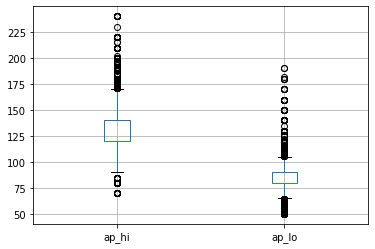

In [159]:
boxplot = df.boxplot(column=['ap_hi', 'ap_lo'])  

Data Distribution


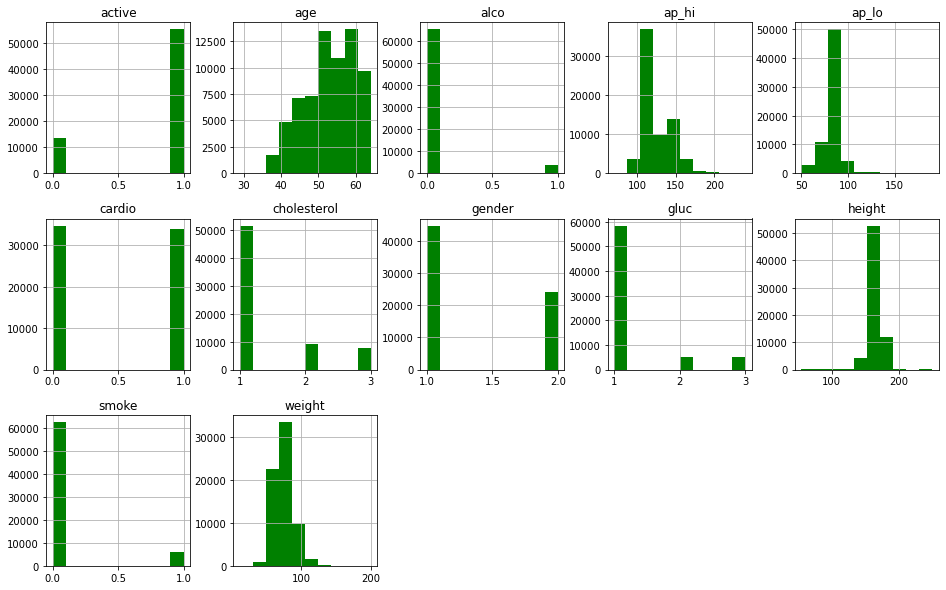

In [160]:
df.hist(layout = (3,5), figsize=(16,10), color = 'g')
print('Data Distribution')

This looks like a fairly balanced dataset, as distribution of majority and minority class is around 50:50


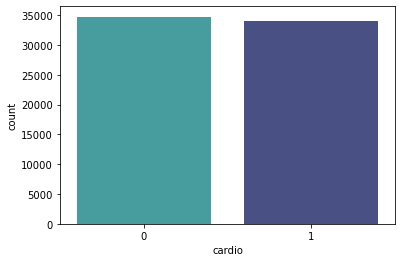

In [161]:
print('This looks like a fairly balanced dataset, as distribution of majority and minority class is around 50:50')
sns.countplot(x="cardio", data=df, palette="mako_r")
plt.show()

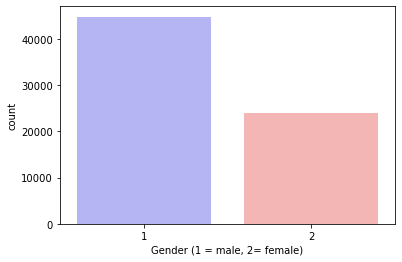

In [162]:
sns.countplot(x='gender', data=df, palette="bwr")
plt.xlabel("Gender (1 = male, 2= female)")
plt.show()

Analysing distribution of target and sex (0-female 1-male)


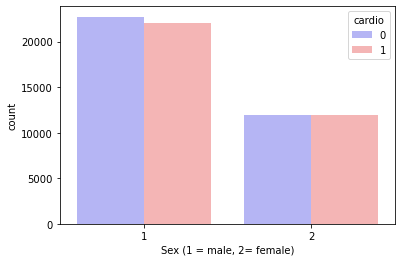

In [163]:
print('Analysing distribution of target and sex (0-female 1-male)')
sns.countplot(x = df['gender'], hue = df['cardio'], palette='bwr') 
plt.xlabel("Sex (1 = male, 2= female)")
plt.show()

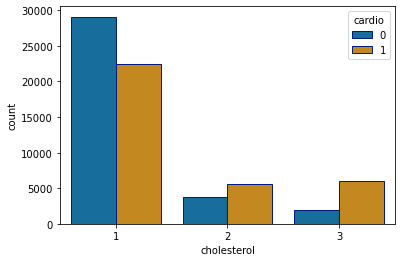

In [164]:
sns.countplot(x='cholesterol',data=df,hue='cardio',palette='colorblind',linewidth=1,edgecolor=sns.color_palette('dark',n_colors=1))
plt.show()

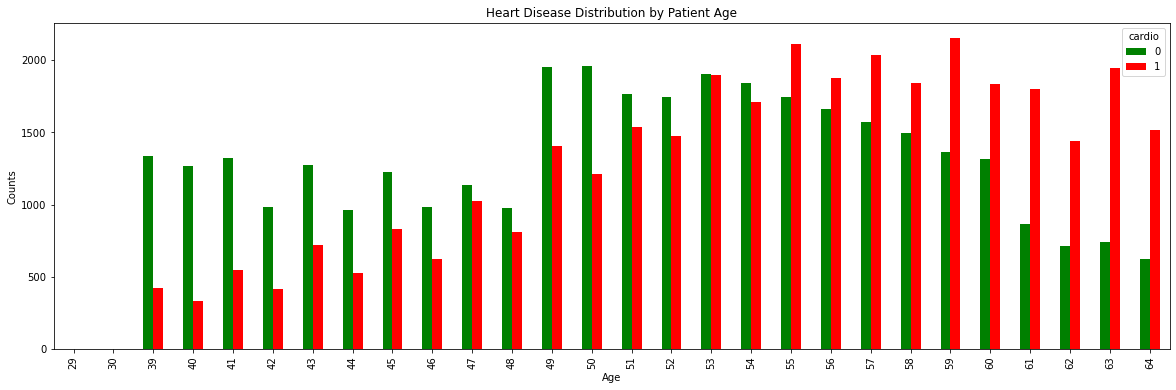

In [165]:
pd.crosstab(df.age,df.cardio).plot(kind="bar",figsize=(20,6), color = ['g','r'])
plt.title('Heart Disease Distribution by Patient Age')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

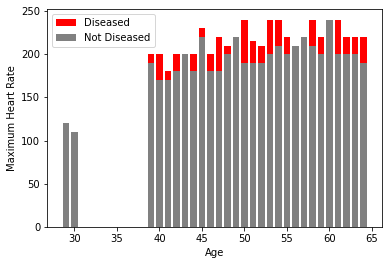

In [166]:
plt.bar(df.age[df.cardio==1], df.ap_hi[(df.cardio==1)], color="red")
plt.bar(df.age[df.cardio==0], df.ap_hi[(df.cardio==0)], color="grey")
plt.legend(["Diseased", "Not Diseased"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

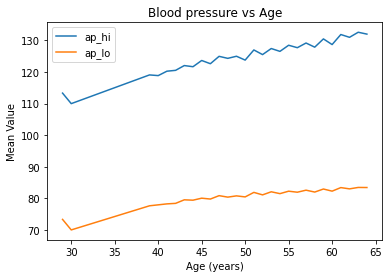

In [167]:
df.groupby(by = "age")[ "ap_hi", "ap_lo"].mean().plot()
plt.title("Blood pressure vs Age")
plt.xlabel("Age (years)")
plt.ylabel("Mean Value")
plt.show()

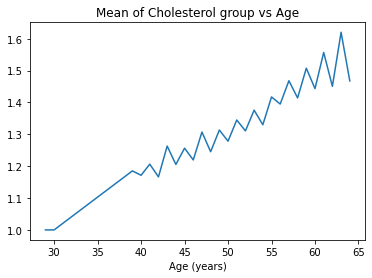

In [168]:
df.groupby(by = "age")[ "cholesterol"].mean().plot()
plt.title("Mean of Cholesterol group vs Age")
plt.xlabel("Age (years)") 
plt.show()

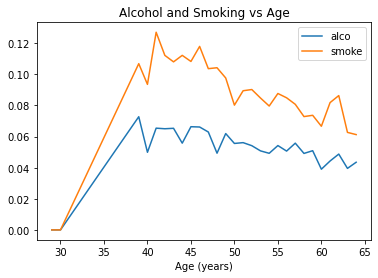

In [169]:
df.groupby(by = "age")[ "alco", "smoke"].mean().plot()
plt.title("Alcohol and Smoking vs Age")
plt.xlabel("Age (years)")
plt.show()

In [170]:
df.shape

(68755, 12)

In [171]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [172]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
scaler = MinMaxScaler()

In [174]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [175]:
df_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
19868,0.342857,0.0,0.538860,0.301587,0.294118,0.214286,0.0,0.0,0,0,1,0
30519,0.542857,0.0,0.559585,0.301587,0.411765,0.214286,0.0,0.0,0,0,1,0
6438,0.771429,1.0,0.595855,0.306878,0.294118,0.214286,0.5,0.0,1,0,0,1
29407,0.628571,0.0,0.533679,0.402116,0.411765,0.285714,0.0,0.0,0,0,1,1
27498,0.914286,0.0,0.518135,0.275132,0.470588,0.214286,0.0,0.0,0,0,0,1


In [176]:
df_train.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,55004.000000,55004.000000,55004.000000,55004.000000,55004.000000,55004.000000,55004.000000,55004.000000,55004.000000,55004.000000,55004.000000,55004.000000
mean,0.680988,0.351011,0.556385,0.333906,0.333045,0.224281,0.182741,0.112165,0.088339,0.053832,0.803832,0.496946
std,0.193353,0.477291,0.042445,0.075764,0.098749,0.069076,0.339748,0.284605,0.283790,0.225689,0.397100,0.499995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.542857,0.000000,0.528497,0.285714,0.294118,0.214286,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.685714,0.000000,0.559585,0.322751,0.294118,0.214286,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.828571,1.000000,0.585492,0.375661,0.411765,0.285714,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


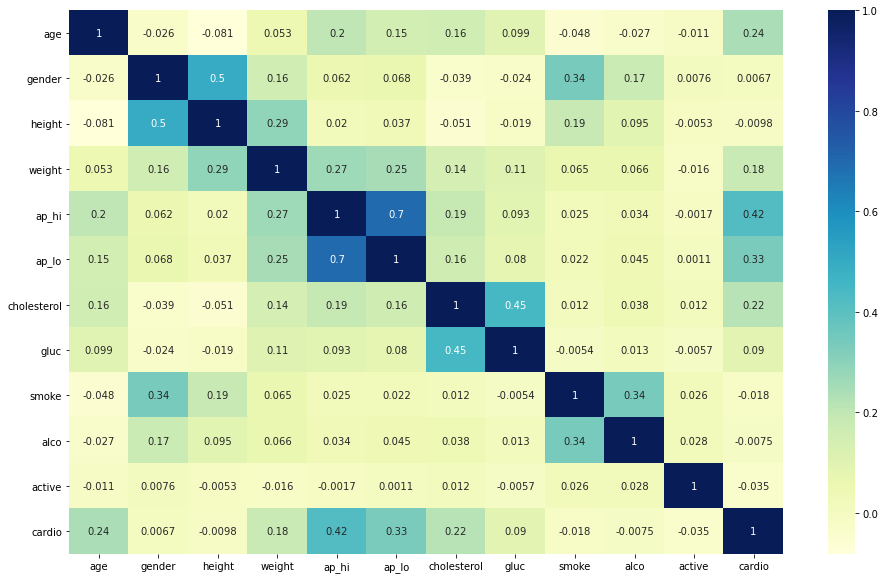

In [177]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [178]:
y_train = df_train.pop('cardio')
X_train = df_train

y_test = df_test.pop("cardio")
X_test = df_test

## Feature Selection

In [195]:
from sklearn.linear_model import LogisticRegression

In [196]:
model = LogisticRegression()

In [197]:
from sklearn.feature_selection import RFE
rfe = RFE(model, 9)             # running RFE with 9 variables as output
rfe = rfe.fit(X_train, y_train)

In [198]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [199]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', True, 1),
 ('height', True, 1),
 ('weight', True, 1),
 ('ap_hi', True, 1),
 ('ap_lo', True, 1),
 ('cholesterol', True, 1),
 ('gluc', True, 1),
 ('alco', True, 1),
 ('active', True, 1)]

In [200]:
col = X_train.columns[rfe.support_]

In [201]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [202]:
X_train = X_train[col]
X_test = X_test[col]

In [203]:
X_test

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,alco,active
id,,,,,,,,,
27638,0.514286,0.528497,0.232804,0.235294,0.142857,0.0,0.0,0,1
88468,0.628571,0.580311,0.386243,0.352941,0.214286,0.0,0.0,0,0
48430,0.542857,0.606218,0.354497,0.294118,0.214286,0.0,0.0,0,0
95733,0.800000,0.533679,0.502646,0.294118,0.214286,0.5,0.0,0,1
96371,0.371429,0.549223,0.269841,0.294118,0.285714,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
24254,0.857143,0.512953,0.365079,0.352941,0.285714,0.5,0.5,0,1
50972,0.514286,0.523316,0.481481,0.294118,0.214286,0.0,1.0,0,1
53597,0.485714,0.569948,0.301587,0.176471,0.071429,0.5,0.0,0,1


## Logistic Regression

In [204]:
model.fit(X_train, y_train)

LogisticRegression()

In [205]:
# Predict for One Observation (image)
model.predict(X_test)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [206]:
predictions = model.predict(X_test)

In [207]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, predictions)
print('Accuracy is:',accuracy)

Accuracy is: 0.7283106683150317


Accuracy of LogisticRegression() : 0.73
ROC AUC Score of LogisticRegression() : 0.73
Confusion Matrix of LogisticRegression() : 



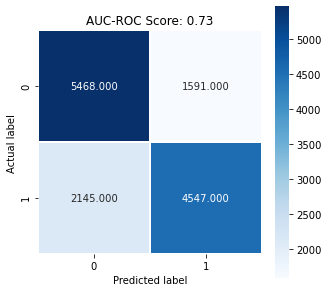

In [210]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
cm = metrics.confusion_matrix(y_test, predictions)
accuracy = metrics.accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions, average='weighted')
    
print("Accuracy of",model,": {:.2f}".format(accuracy))
print("ROC AUC Score of", model,": {:.2f}".format(roc_auc))
print("Confusion Matrix of", model,": \n")
    
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'AUC-ROC Score: {:.2f}'.format(roc_auc)
plt.title(title)
plt.show()

In [211]:
from sklearn import metrics

# For precision of each class individually use average= None
precision = metrics.precision_score(y_test, predictions, average='macro')
print('Precision is:',precision)

Precision is: 0.729520077150192


In [212]:
from sklearn import metrics

# For recall of each class individually use average= None
recall = metrics.recall_score(y_test, predictions, average='macro')
print('Recall is:',recall)

Recall is: 0.7270409947511822


In [213]:
from sklearn import metrics

# For recall of each class individually use average= None
f1_score_value = metrics.f1_score(y_test, predictions, average='macro')
print('F1 Score is:',f1_score_value)

F1 Score is: 0.7270864020820884


## Decision Trees

In [214]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [215]:
dt = DecisionTreeClassifier(max_depth=3)

In [216]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [217]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [218]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s


Wall time: 6.31 s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.0s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [219]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052003,0.002660,0.007601,0.000526,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708676,0.715439,0.716021,0.708894,0.712257,0.003479,37
1,0.048931,0.001904,0.007741,0.000745,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708676,0.715439,0.716021,0.708894,0.712257,0.003479,37
2,0.041777,0.001962,0.007114,0.001003,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708676,0.715439,0.716021,0.708894,0.712257,0.003479,37
3,0.036908,0.000738,0.006101,0.001044,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708676,0.715439,0.716021,0.708894,0.712257,0.003479,37
4,0.036499,0.001566,0.005242,0.001095,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708676,0.715439,0.716021,0.708894,0.712257,0.003479,37


In [220]:
dt_best = grid_search.best_estimator_

In [221]:
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20)

In [222]:
from sklearn.metrics import confusion_matrix, accuracy_score

Train Accuracy : 0.7318558650279979
Accuracy of DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20) : 0.73
ROC AUC Score of DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20) : 0.73
Confusion Matrix of DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20) : 



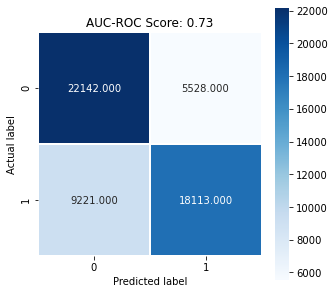

--------------------------------------------------
Test Accuracy : 0.7334739291687877
Accuracy of DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20) : 0.73
ROC AUC Score of DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20) : 0.73
Confusion Matrix of DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20) : 



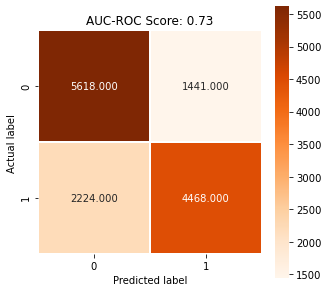

In [233]:
print("Train Accuracy :", accuracy_score(y_train, dt_best.predict(X_train)))
cm = metrics.confusion_matrix(y_train, dt_best.predict(X_train))
accuracy = metrics.accuracy_score(y_train, dt_best.predict(X_train))
roc_auc = roc_auc_score(y_train, dt_best.predict(X_train), average='weighted')
    
print("Accuracy of",dt_best,": {:.2f}".format(accuracy))
print("ROC AUC Score of", dt_best,": {:.2f}".format(roc_auc))
print("Confusion Matrix of", dt_best,": \n")
    
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'AUC-ROC Score: {:.2f}'.format(roc_auc)
plt.title(title)
plt.show()

print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_best.predict(X_test)))
cm = metrics.confusion_matrix(y_test, dt_best.predict(X_test))
accuracy = metrics.accuracy_score(y_test, dt_best.predict(X_test))
roc_auc = roc_auc_score(y_test, dt_best.predict(X_test), average='weighted')
    
print("Accuracy of",dt_best,": {:.2f}".format(accuracy))
print("ROC AUC Score of", dt_best,": {:.2f}".format(roc_auc))
print("Confusion Matrix of", dt_best,": \n")
    
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'AUC-ROC Score: {:.2f}'.format(roc_auc)
plt.title(title)
plt.show()



## Random Forest

In [234]:
from sklearn.ensemble import RandomForestClassifier

In [235]:
rf = RandomForestClassifier(random_state=0, n_estimators=10, max_depth=3)

In [236]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

Train Accuracy : 0.721220274889099
Accuracy of RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0) : 0.72
ROC AUC Score of RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0) : 0.72
Confusion Matrix of RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0) : 



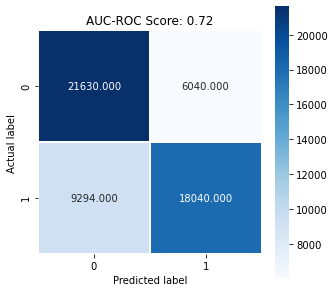

--------------------------------------------------
Test Accuracy : 0.7224929096065741
Accuracy of RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0) : 0.72
ROC AUC Score of RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0) : 0.72
Confusion Matrix of RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0) : 



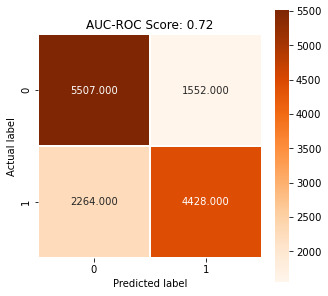

In [244]:
print("Train Accuracy :", accuracy_score(y_train, rf.predict(X_train)))
cm = metrics.confusion_matrix(y_train, rf.predict(X_train))
accuracy = metrics.accuracy_score(y_train, rf.predict(X_train))
roc_auc = roc_auc_score(y_train, rf.predict(X_train), average='weighted')
    
print("Accuracy of",rf,": {:.2f}".format(accuracy))
print("ROC AUC Score of", rf,": {:.2f}".format(roc_auc))
print("Confusion Matrix of", rf,": \n")
    
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'AUC-ROC Score: {:.2f}'.format(roc_auc)
plt.title(title)
plt.show()

print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, rf.predict(X_test)))
cm = metrics.confusion_matrix(y_test, rf.predict(X_test))
accuracy = metrics.accuracy_score(y_test, rf.predict(X_test))
roc_auc = roc_auc_score(y_test, rf.predict(X_test), average='weighted')
    
print("Accuracy of",rf,": {:.2f}".format(accuracy))
print("ROC AUC Score of", rf,": {:.2f}".format(roc_auc))
print("Confusion Matrix of", rf,": \n")
    
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'AUC-ROC Score: {:.2f}'.format(roc_auc)
plt.title(title)
plt.show()


In [238]:
#hyperparameter tuning
classifier_rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [239]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 3, 10, 12,18, 20],
    'min_samples_leaf': [5, 10, 12, 20, 50, 85, 100],
    'max_features': [2,3, 6],
    'n_estimators': [10, 20,30, 50,  100,  200]
}

In [240]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [241]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 882 candidates, totalling 3528 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 3528 out of 3528 | elapsed: 26.8min finished


Wall time: 26min 54s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 10, 12, 18, 20],
                         'max_features': [2, 3, 6],
                         'min_samples_leaf': [5, 10, 12, 20, 50, 85, 100],
                         'n_estimators': [10, 20, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [242]:
rf_best = grid_search.best_estimator_

Train Accuracy : 0.7607264926187186
Accuracy of RandomForestClassifier(max_depth=18, max_features=3, min_samples_leaf=12,
                       n_estimators=200, n_jobs=-1, random_state=0) : 0.76
ROC AUC Score of RandomForestClassifier(max_depth=18, max_features=3, min_samples_leaf=12,
                       n_estimators=200, n_jobs=-1, random_state=0) : 0.76
Confusion Matrix of RandomForestClassifier(max_depth=18, max_features=3, min_samples_leaf=12,
                       n_estimators=200, n_jobs=-1, random_state=0) : 



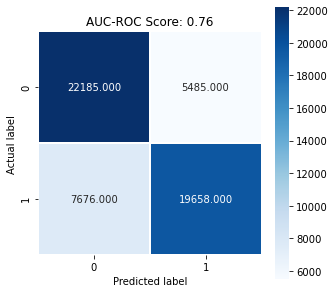

--------------------------------------------------
Test Accuracy : 0.7352919787651807
Accuracy of RandomForestClassifier(max_depth=18, max_features=3, min_samples_leaf=12,
                       n_estimators=200, n_jobs=-1, random_state=0) : 0.74
ROC AUC Score of RandomForestClassifier(max_depth=18, max_features=3, min_samples_leaf=12,
                       n_estimators=200, n_jobs=-1, random_state=0) : 0.73
Confusion Matrix of RandomForestClassifier(max_depth=18, max_features=3, min_samples_leaf=12,
                       n_estimators=200, n_jobs=-1, random_state=0) : 



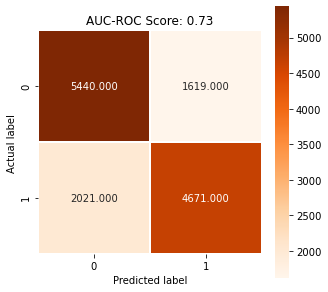

In [243]:
print("Train Accuracy :", accuracy_score(y_train, rf_best.predict(X_train)))
cm = metrics.confusion_matrix(y_train, rf_best.predict(X_train))
accuracy = metrics.accuracy_score(y_train, rf_best.predict(X_train))
roc_auc = roc_auc_score(y_train, rf_best.predict(X_train), average='weighted')
    
print("Accuracy of",rf_best,": {:.2f}".format(accuracy))
print("ROC AUC Score of", rf_best,": {:.2f}".format(roc_auc))
print("Confusion Matrix of", rf_best,": \n")
    
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'AUC-ROC Score: {:.2f}'.format(roc_auc)
plt.title(title)
plt.show()

print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, rf_best.predict(X_test)))
cm = metrics.confusion_matrix(y_test, rf_best.predict(X_test))
accuracy = metrics.accuracy_score(y_test, rf_best.predict(X_test))
roc_auc = roc_auc_score(y_test, rf_best.predict(X_test), average='weighted')
    
print("Accuracy of",rf_best,": {:.2f}".format(accuracy))
print("ROC AUC Score of", rf_best,": {:.2f}".format(roc_auc))
print("Confusion Matrix of", rf_best,": \n")
    
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'AUC-ROC Score: {:.2f}'.format(roc_auc)
plt.title(title)
plt.show()
